## Import Libraries

In [3]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Evaluation Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



## Loading Data 

In [4]:
yield_df = pd.read_csv('yield_df.csv')
df = yield_df.copy()

In [5]:
df.shape

(28242, 8)

In [6]:
df.dtypes

Unnamed: 0                         int64
Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [8]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.head()

Area         Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0  Albania        Maize  1990        36613                         1485.0   
1  Albania     Potatoes  1990        66667                         1485.0   
2  Albania  Rice, paddy  1990        23333                         1485.0   
3  Albania      Sorghum  1990        12500                         1485.0   
4  Albania     Soybeans  1990         7000                         1485.0   

   pesticides_tonnes  avg_temp  
0              121.0     16.37  
1              121.0     16.37  
2              121.0     16.37  
3              121.0     16.37  
4              121.0     16.37

In [11]:
df.describe()

Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  28242.000000   28242.000000                    28242.00000   
mean    2001.544296   77053.332094                     1149.05598   
std        7.051905   84956.612897                      709.81215   
min     1990.000000      50.000000                       51.00000   
25%     1995.000000   19919.250000                      593.00000   
50%     2001.000000   38295.000000                     1083.00000   
75%     2008.000000  104676.750000                     1668.00000   
max     2013.000000  501412.000000                     3240.00000   

       pesticides_tonnes      avg_temp  
count       28242.000000  28242.000000  
mean        37076.909344     20.542627  
std         59958.784665      6.312051  
min             0.040000      1.300000  
25%          1702.000000     16.702500  
50%         17529.440000     21.510000  
75%         48687.880000     26.000000  
max        367778.000000     30.650000

In [12]:
df['Area'].value_counts()

Area
India         4048
Brazil        2277
Mexico        1472
Pakistan      1449
Australia      966
              ... 
Latvia          42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: count, Length: 101, dtype: int64

In [13]:
df['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [14]:
df.duplicated().sum()

np.int64(2310)

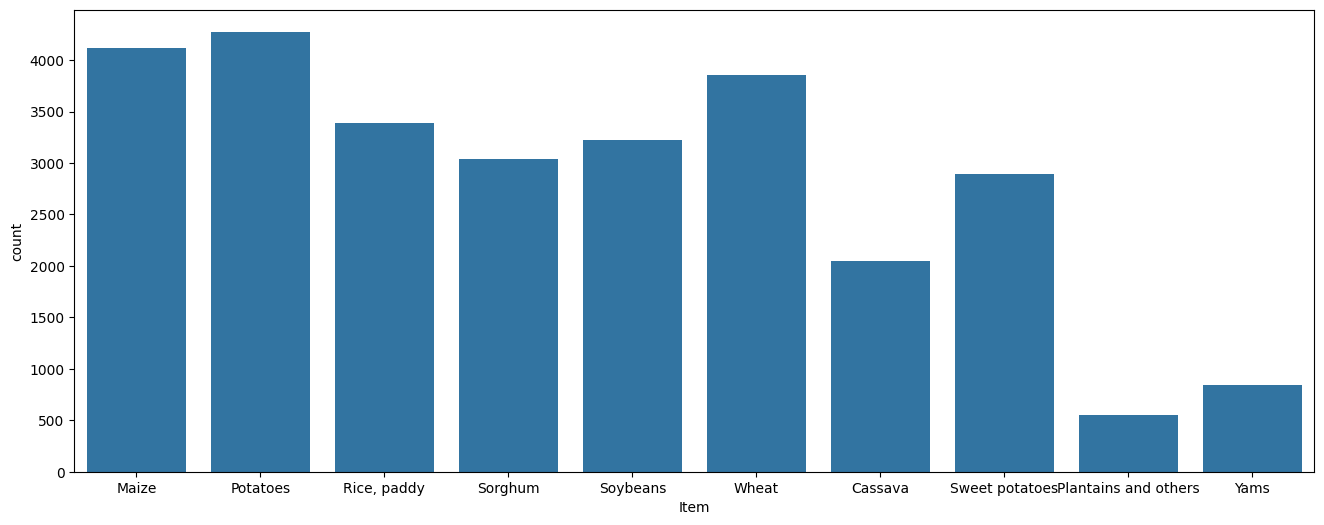

In [15]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x= 'Item')
plt.show()

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

<Axes: >

In [17]:
plt.figure(figsize=(15,5))
sns.histplot(df['Area'])
plt.show()

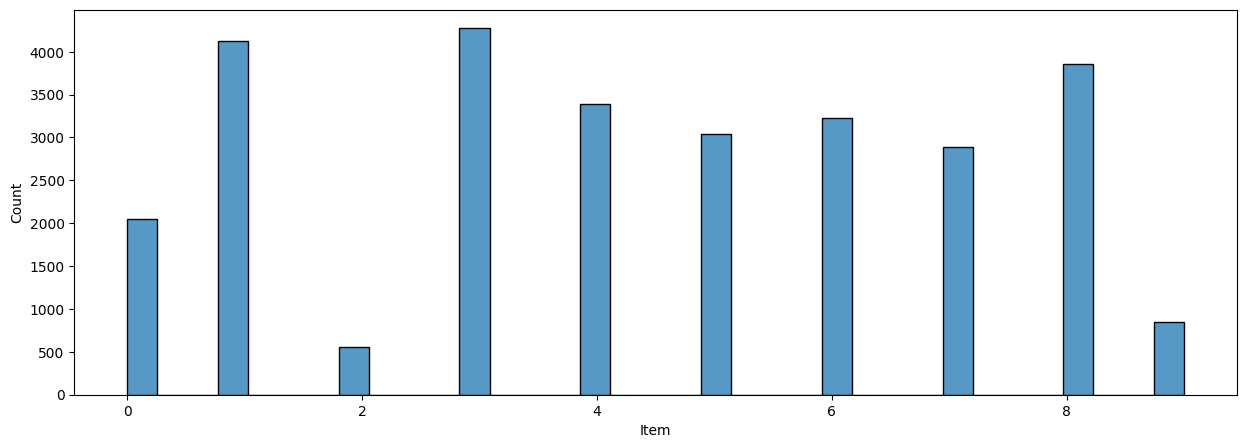

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(df['Item'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11868\3767856135.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')


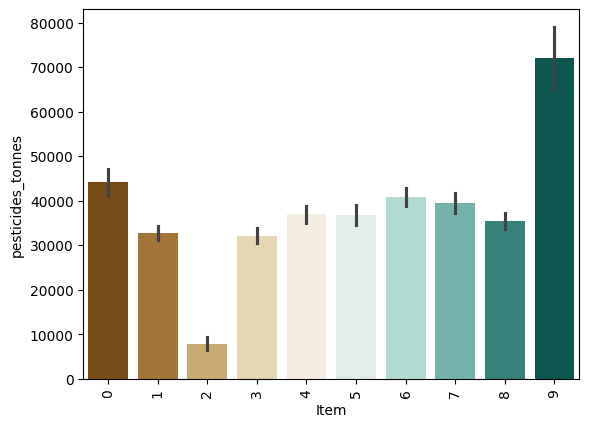

In [19]:
sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='BrBG')
plt.xticks(rotation=90)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11868\2523189735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item' , y= 'hg/ha_yield' , data=df , palette='BrBG')


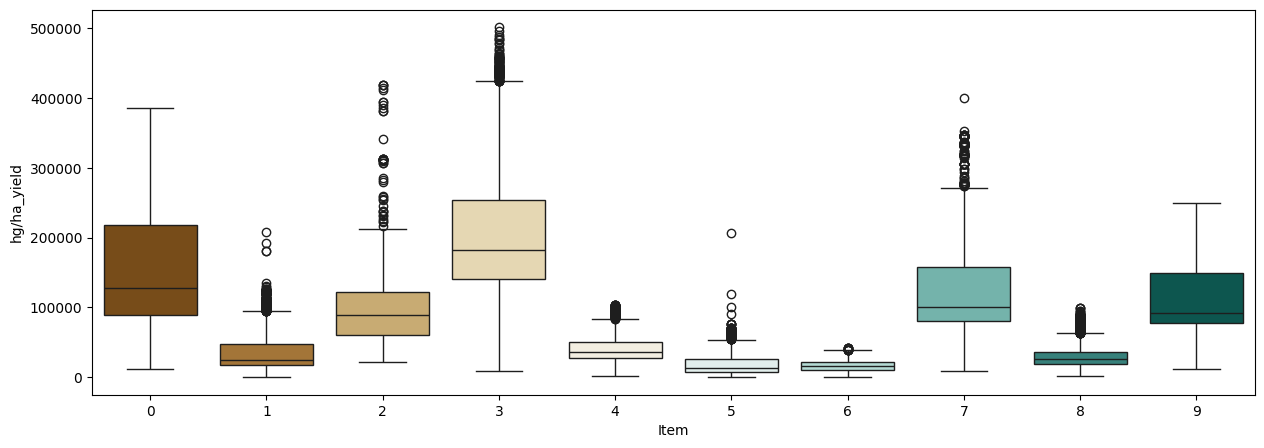

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Item' , y= 'hg/ha_yield' , data=df , palette='BrBG')
plt.show()

## Transforming average_rain_fall_mm_per_year

In [21]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True

to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [22]:
df = df.drop(to_drop)

In [23]:
df

Area  Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0         0     1  1990        36613                         1485.0   
1         0     3  1990        66667                         1485.0   
2         0     4  1990        23333                         1485.0   
3         0     5  1990        12500                         1485.0   
4         0     6  1990         7000                         1485.0   
...     ...   ...   ...          ...                            ...   
28237   100     4  2013        22581                          657.0   
28238   100     5  2013         3066                          657.0   
28239   100     6  2013        13142                          657.0   
28240   100     7  2013        22222                          657.0   
28241   100     8  2013        22888                          657.0   

       pesticides_tonnes  avg_temp  
0                 121.00     16.37  
1                 121.00     16.37  
2                 121.00     16.37  
3                 121.00     16.37  
4                 121.00     16.37  
...                  ...       ...  
28237            2550.07     19.76  
28238            2550.07     19.76  
28239            2550.07     19.76  
28240            2550.07     19.76  
28241            2550.07     19.76  

[28242 rows x 7 columns]

## Count Plot Frequency vs Area

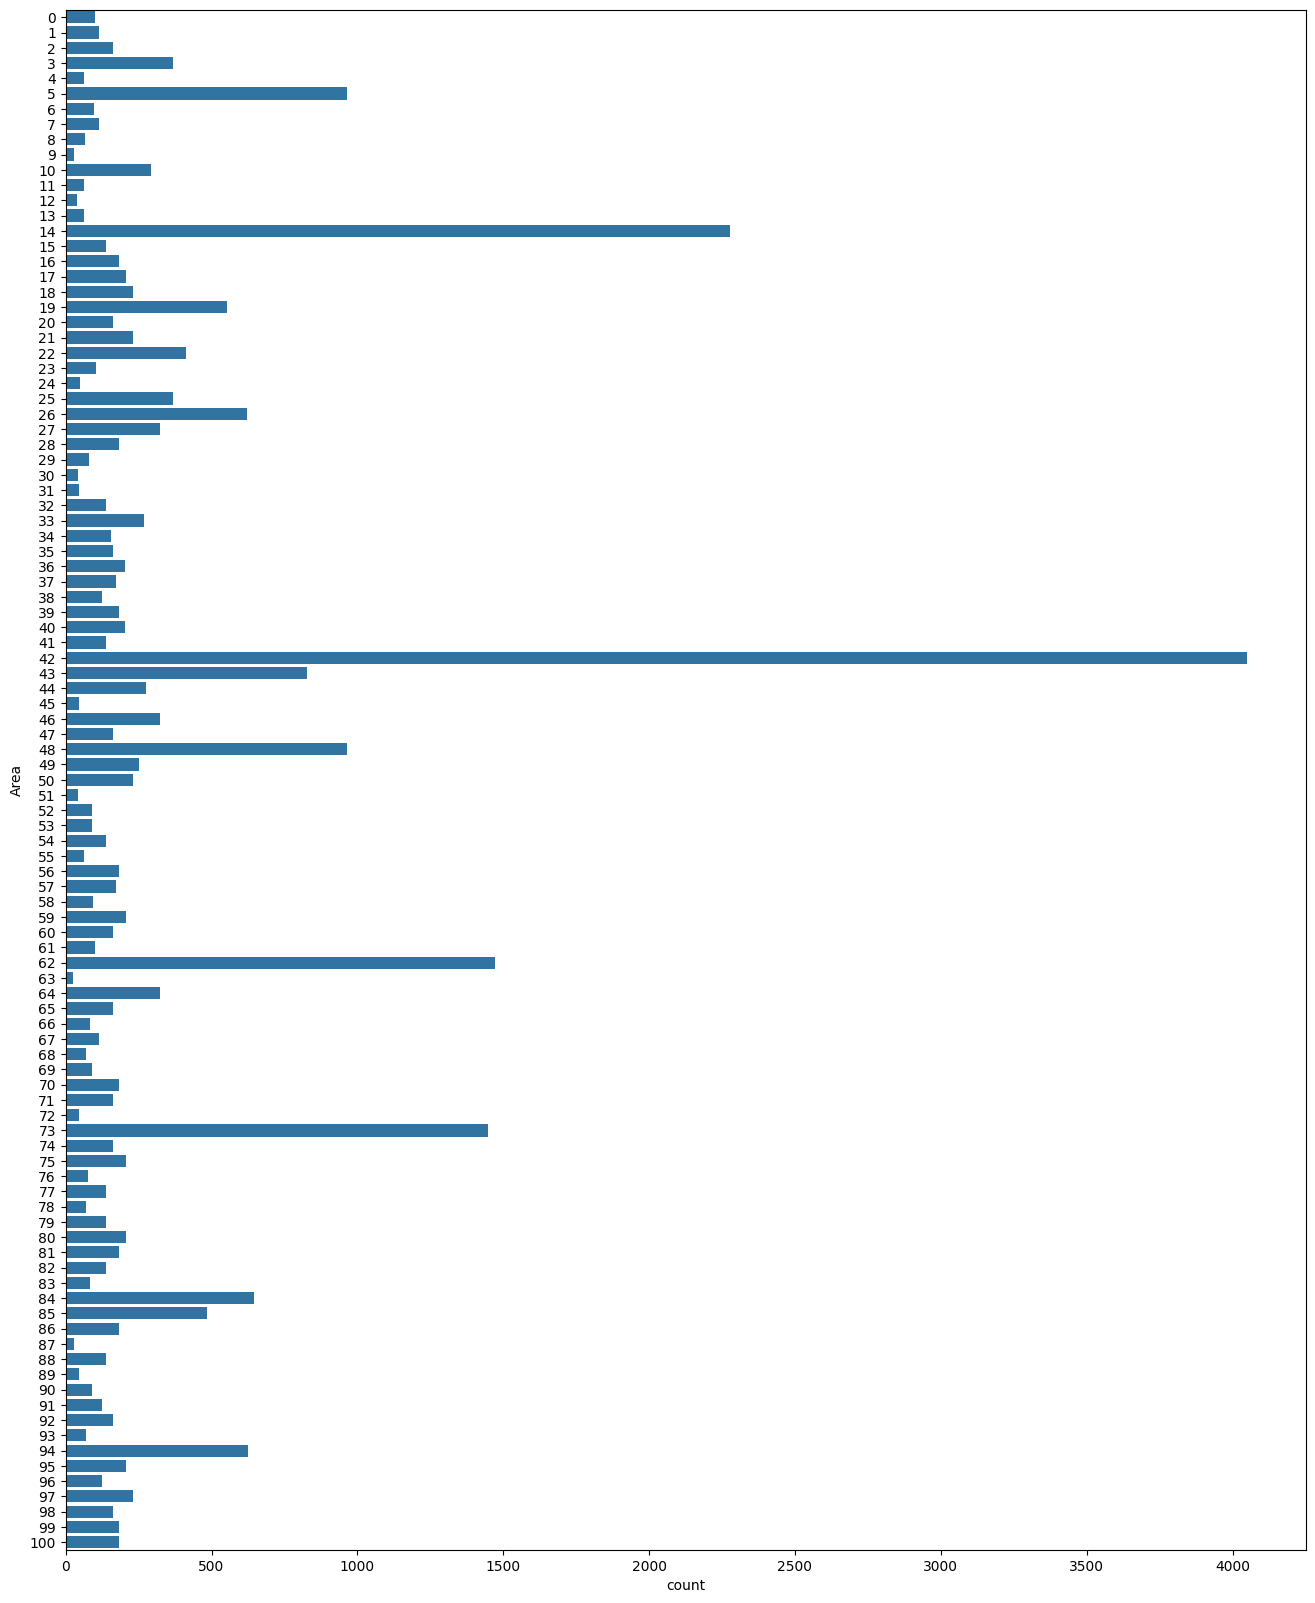

In [24]:
plt.figure(figsize=(16,20))
sns.countplot(data=df , y='Area')
plt.show()

In [25]:
len(df['Area'])

28242

In [26]:
(df['Area'].value_counts()<500).sum()

np.int64(90)

In [27]:
sns.countplot(y = df['Item'])

<Axes: xlabel='count', ylabel='Item'>

## Yield vs Item

In [28]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

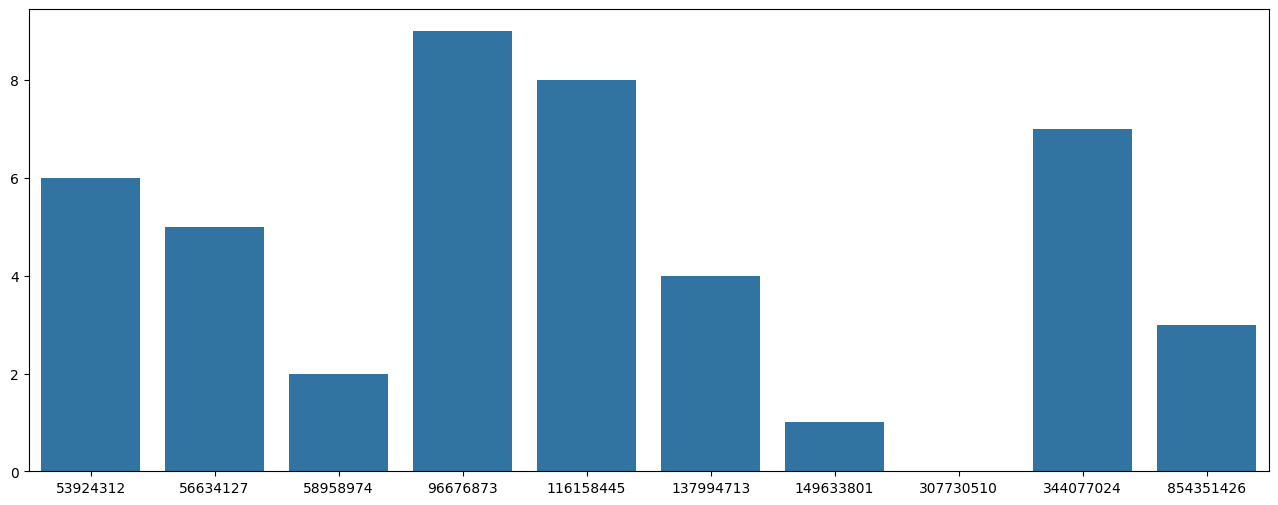

In [29]:
plt.figure(figsize=(16,6))
sns.barplot(y= crops, x=yield_per_crop)

## Train Test Split Rearranging Columns

In [30]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]


In [31]:
df

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  Area  \
0      1990                         1485.0             121.00     16.37     0   
1      1990                         1485.0             121.00     16.37     0   
2      1990                         1485.0             121.00     16.37     0   
3      1990                         1485.0             121.00     16.37     0   
4      1990                         1485.0             121.00     16.37     0   
...     ...                            ...                ...       ...   ...   
28237  2013                          657.0            2550.07     19.76   100   
28238  2013                          657.0            2550.07     19.76   100   
28239  2013                          657.0            2550.07     19.76   100   
28240  2013                          657.0            2550.07     19.76   100   
28241  2013                          657.0            2550.07     19.76   100   

       Item  hg/ha_yield  
0         1        36613  
1         3        66667  
2         4        23333  
3         5        12500  
4         6         7000  
...     ...          ...  
28237     4        22581  
28238     5         3066  
28239     6        13142  
28240     7        22222  
28241     8        22888  

[28242 rows x 7 columns]

In [32]:
columnss = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item']

In [33]:
X = df.drop('hg/ha_yield',axis=1)
y = df['hg/ha_yield']

## Normalization

In [34]:
# scale the features
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled_minmax, columns =columnss)
X.head()

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  Area  \
0   0.0                       0.449671           0.000329  0.513458   0.0   
1   0.0                       0.449671           0.000329  0.513458   0.0   
2   0.0                       0.449671           0.000329  0.513458   0.0   
3   0.0                       0.449671           0.000329  0.513458   0.0   
4   0.0                       0.449671           0.000329  0.513458   0.0   

       Item  
0  0.111111  
1  0.333333  
2  0.444444  
3  0.555556  
4  0.666667

In [35]:
xtrain , xtest , ytrain , ytest = train_test_split(X , y , test_size= 0.3, random_state=42 , shuffle=True)

In [36]:
print(xtrain.shape , xtest.shape)
print(ytrain.shape , ytest.shape)

(19769, 6) (8473, 6)
(19769,) (8473,)


In [37]:
ohe = OneHotEncoder(drop='first')
preprocesser = ColumnTransformer(
        transformers = [
            ('onehotencoder', ohe, [4,5])
        ],
        remainder='passthrough'
)

In [38]:
X_train_dummy = preprocesser.fit_transform(xtrain)
X_test_dummy = preprocesser.transform(xtest)

## Apply Different ML Models
### Training , Predicting and Testing Model

In [39]:
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'rg':Ridge(),
    'KNN':KNeighborsRegressor(),
    'dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,ytrain)
    y_pred = md.predict(X_test_dummy)

    print(f"{name}  Mean Absolute Error : {mean_squared_error(ytest,y_pred)} --- R2 score : {r2_score(ytest,y_pred)}")


lr  Mean Absolute Error : 1773053077.3236291 --- R2 score : 0.7607908977264015
lss  Mean Absolute Error : 1773410303.2264323 --- R2 score : 0.7607427030679272
rg  Mean Absolute Error : 1773964022.2186458 --- R2 score : 0.7606679988051315
KNN  Mean Absolute Error : 112422146.08406468 --- R2 score : 0.9848327153967473
dtr  Mean Absolute Error : 146360768.71261653 --- R2 score : 0.9802539311769128


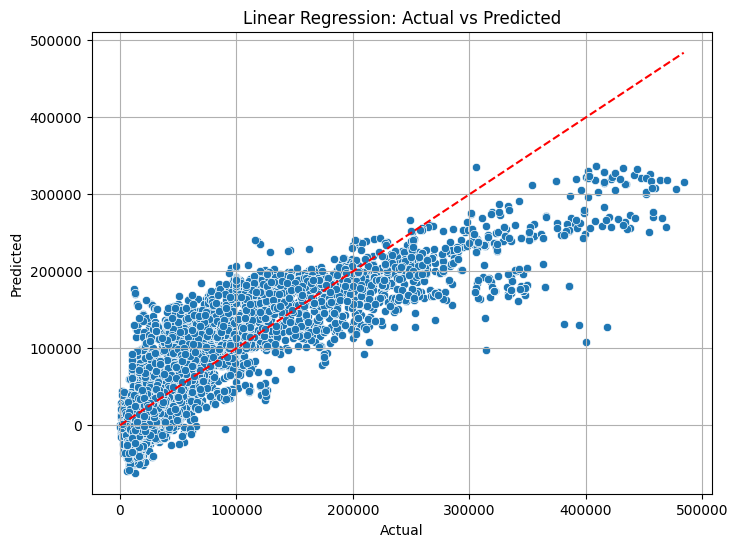

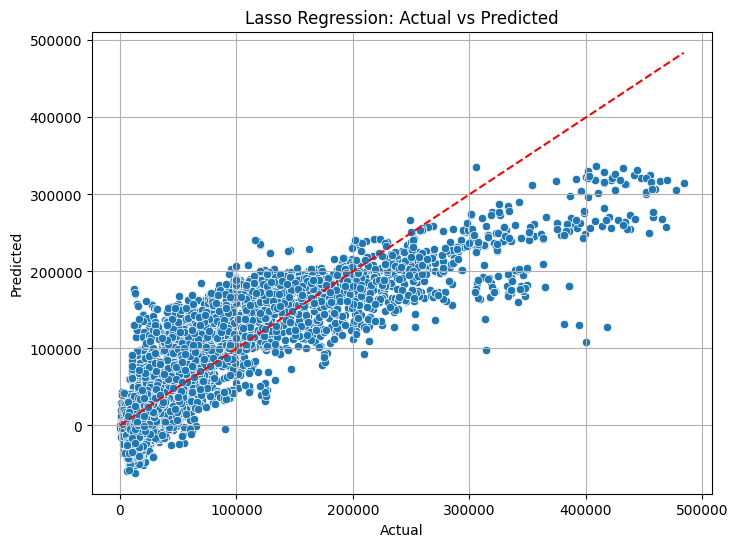

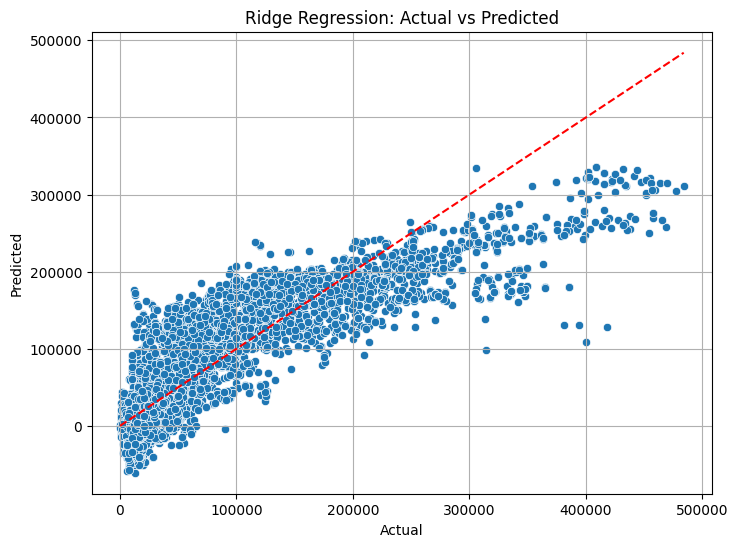

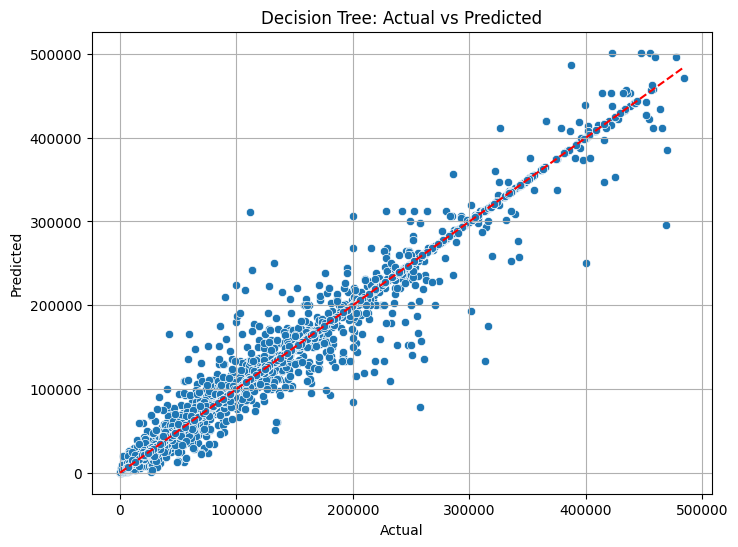

In [40]:
model_labels = {
    'lr': 'Linear Regression',
    'lss': 'Lasso Regression',
    'rg': 'Ridge Regression',
    'KNN': 'K-Nearest Neighbors',
    'dtr': 'Decision Tree'
}

for key, model in models.items():
    y_pred = model.predict(X_test_dummy)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=ytest, y=y_pred)
    plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], '--r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{model_labels[key]}: Actual vs Predicted')
    plt.grid(True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11868\2864697138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mse_scores, palette="BrBG")


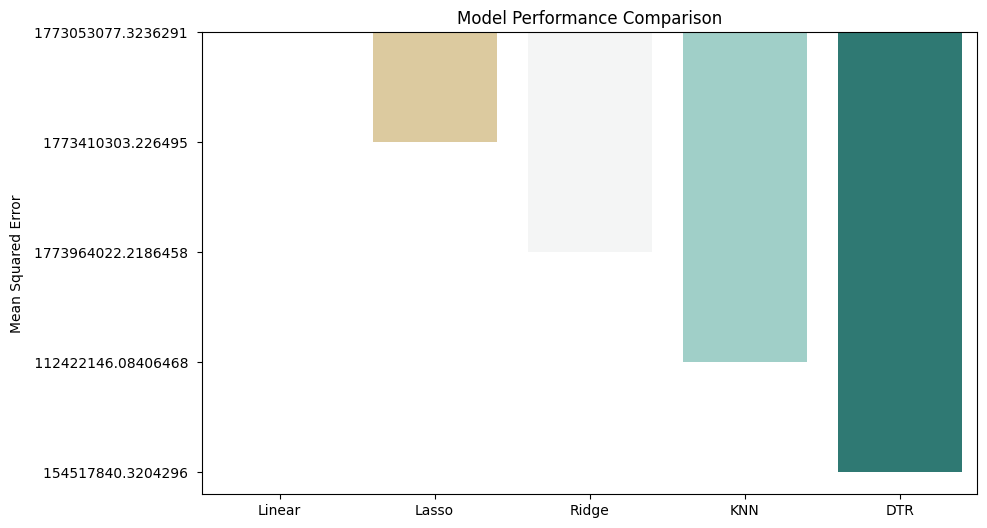

In [41]:
model_names = ['Linear', 'Lasso', 'Ridge', 'KNN', 'DTR']
mse_scores = ['1773053077.3236291 ', '1773410303.226495 ', '1773964022.2186458 ', ' 112422146.08406468 ', '154517840.3204296 '] 
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_scores, palette="BrBG")
plt.ylabel("Mean Squared Error")
plt.title("Model Performance Comparison")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11868\2535510357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette='Set1')


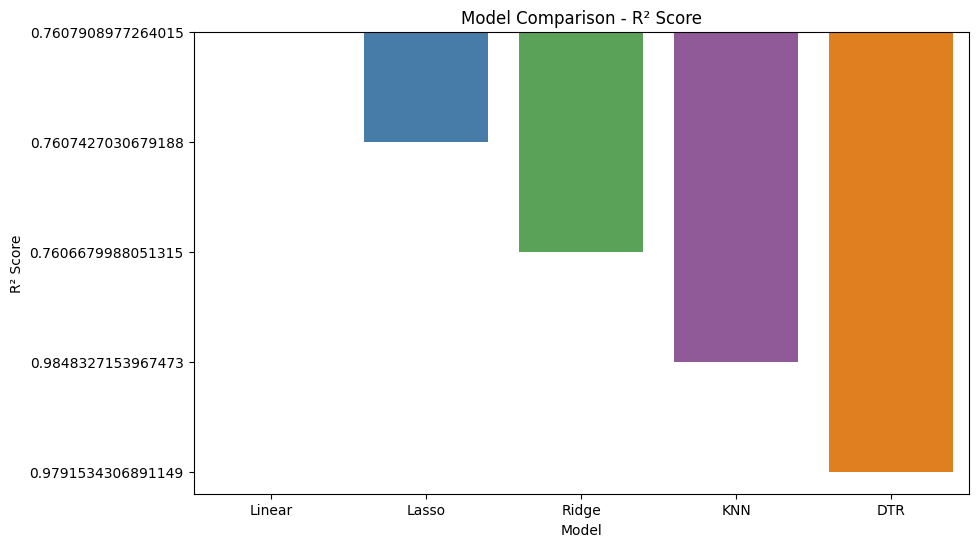

In [42]:
r2_scores = ['0.7607908977264015', '0.7607427030679188', '0.7606679988051315', '0.9848327153967473', '0.9791534306891149']  # actual R² values

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores, palette='Set1')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()

In [43]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,ytrain)
dtr.predict(X_test_dummy)

array([69220., 25000., 51206., ..., 21025., 80000., 24105.])

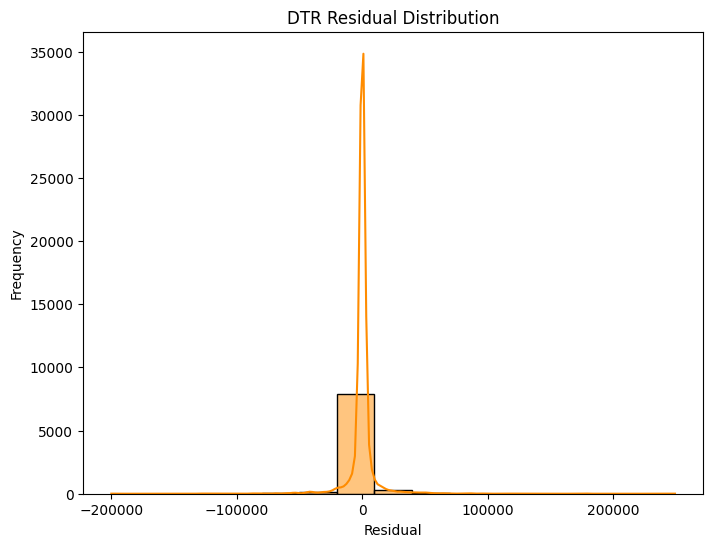

In [44]:
y_pred_dtr = dtr.predict(X_test_dummy)
residuals_dtr = ytest - y_pred_dtr

plt.figure(figsize=(8, 6))
sns.histplot(residuals_dtr, kde=True, color='darkorange')
plt.title('DTR Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

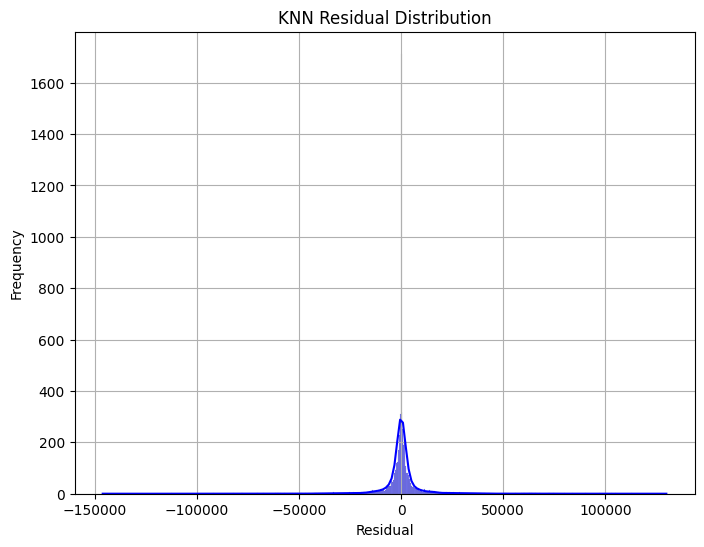

In [45]:
# Predict using KNN and calculate residuals
y_pred_knn = models['KNN'].predict(X_test_dummy)
residuals_knn = ytest - y_pred_knn

# Plot residual distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals_knn, kde=True, color='blue')
plt.title('KNN Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

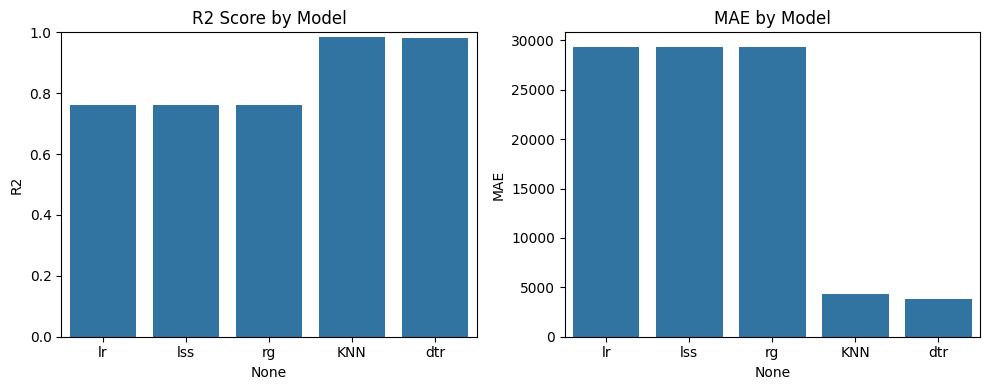

In [46]:
results = {}

for name, md in models.items():
    y_pred = md.predict(X_test_dummy)
    results[name] = {
        'MAE': mean_absolute_error(ytest, y_pred),
        'R2': r2_score(ytest, y_pred)
    }

# Convert to DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T

# Bar plots
plt.figure(figsize=(10, 4))

# R2 Score plot
plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y='R2', data=results_df)
plt.title('R2 Score by Model')
plt.ylim(0, 1)

# MAE plot
plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y='MAE', data=results_df)
plt.title('MAE by Model')
plt.tight_layout()
plt.show()


In [47]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_dummy, ytrain)
rf_preds = rf_model.predict(X_test_dummy)
print("Random Forest Regressor:")
print("MAE:", mean_absolute_error(ytest, rf_preds))
print("R² Score:", r2_score(ytest, rf_preds))
print()

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_dummy, ytrain)
gb_preds = gb_model.predict(X_test_dummy)
print("Gradient Boosting Regressor:")
print("MAE:", mean_absolute_error(ytest, gb_preds))
print("R² Score:", r2_score(ytest, gb_preds))
print()

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42, verbosity=0)
xgb_model.fit(X_train_dummy, ytrain)
xgb_preds = xgb_model.predict(X_test_dummy)
print("XGBoost Regressor:")
print("MAE:", mean_absolute_error(ytest, xgb_preds))
print("R² Score:", r2_score(ytest, xgb_preds))

Random Forest Regressor:
MAE: 3627.095595420749
R² Score: 0.987163241468861

Gradient Boosting Regressor:
MAE: 25234.70859094088
R² Score: 0.7680817239918221

XGBoost Regressor:
MAE: 8549.9951171875
R² Score: 0.9694426655769348
